[*********************100%***********************]  4 of 4 completed


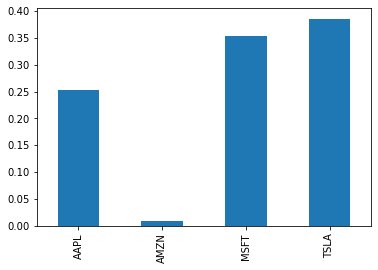

In [4]:
#Performs a Monte Carlo Simulation; using the given stocks, creates 500 randomly weighted portfolios and evaluates their returns and volatility
#Calculates a Sharpe ratio for each, determines the index of the portfolio with the highest Sharpe ratio, and visualizes its weighting

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

s = pd.Series(p_weights[max_ind], index=x.columns)
s.plot(kind='bar')

plt.savefig('plot.png')